In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
women = pd.read_csv('height_mass.csv')
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Height (m)  15 non-null     float64
 1   Mass (kg)   15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [46]:
women

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


**4. Use a Seaborn histplot to show the distribution for Mass.**

C:\Users\helen\anaconda\envs\pythonessential\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


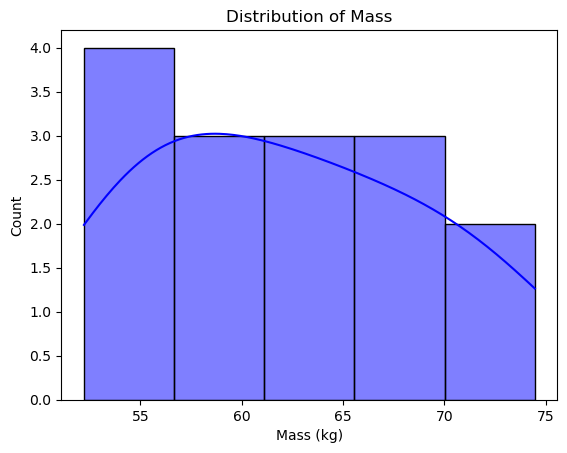

In [13]:
#To include a kernel density estimate (KDE) in the plot, which provides a smoothed estimate of the distribution of the data.
sb.histplot(women['Mass (kg)'],  kde=True, color='blue')
#sb.histplot(data=women, x='Mass (kg)')
plt.title('Distribution of Mass')
plt.show()

Experiment with different bin #’s and find which one gives you the clearest 
information about the data.

C:\Users\helen\anaconda\envs\pythonessential\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mass (kg)', ylabel='Count'>

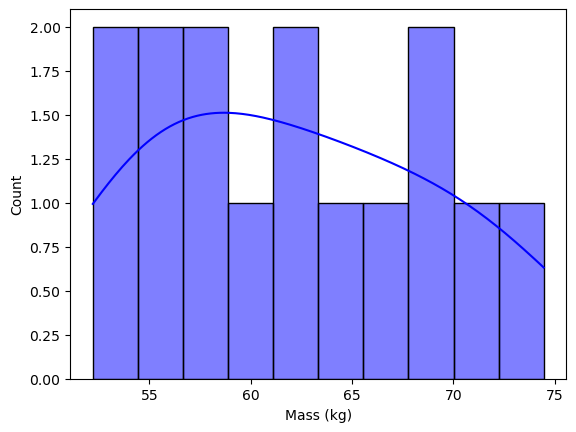

In [14]:
sb.histplot(women['Mass (kg)'],  kde=True, color='blue',bins =10)

C:\Users\helen\anaconda\envs\pythonessential\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mass (kg)', ylabel='Count'>

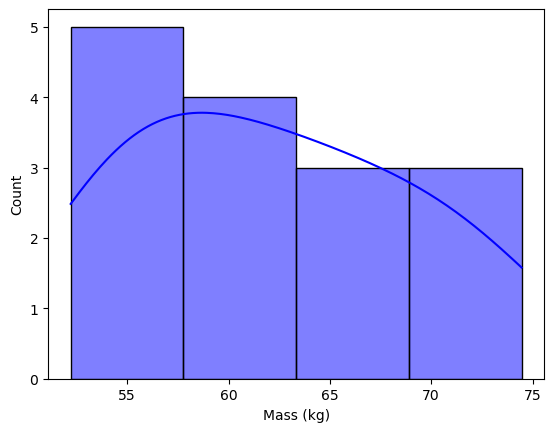

In [15]:
sb.histplot(women['Mass (kg)'],  kde=True, color='blue',bins =4)

It looks like the plot is the best when the bins are equal to 5 becasue the shape of the data goes well with the line of kernel density estimate (KDE).

What does the plot tell you about the data? Be specific. Don’t focus on the 
numbers as much as the visual attributes.

It tells me that the distribution of the data is not normal.It is a little right-skewed, which means there are more samples of lower masses compared to higher masses.

**5. Use a Seaborn histplot to show the distribution for Height.**

C:\Users\helen\anaconda\envs\pythonessential\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height (m)', ylabel='Count'>

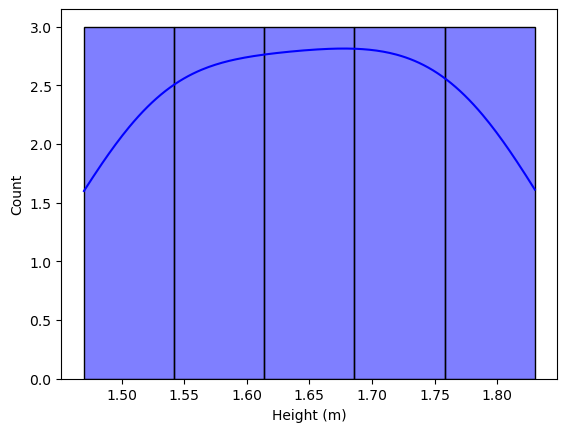

In [16]:
sb.histplot(women['Height (m)'],  kde=True, color='blue')

Experiment with different bin #’s and find which one gives you the clearest 
information about the data.

C:\Users\helen\anaconda\envs\pythonessential\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height (m)', ylabel='Count'>

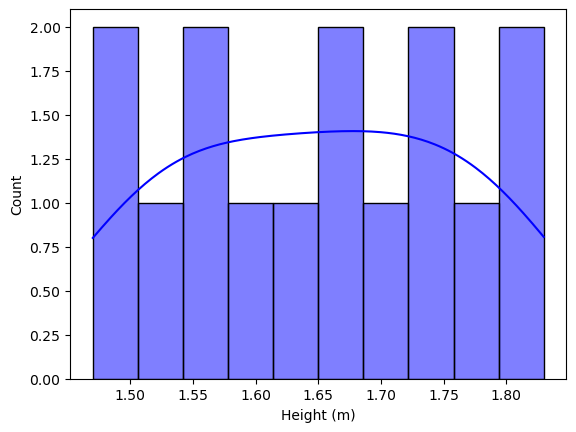

In [17]:
sb.histplot(women['Height (m)'],  kde=True, color='blue',bins = 10)

It looks like the plot is the best when the bins are equal to 5 becasue the shape of the data goes well with the line of kernel density estimate (KDE). This histogram shows me that the distribution is normal because the plot is almost symmetric, which means the samples of lower height are the same as those of higher height.

**6. Use a Seaborn jointplot to plot x=Height, y=Mass**

C:\Users\helen\anaconda\envs\pythonessential\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\helen\anaconda\envs\pythonessential\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


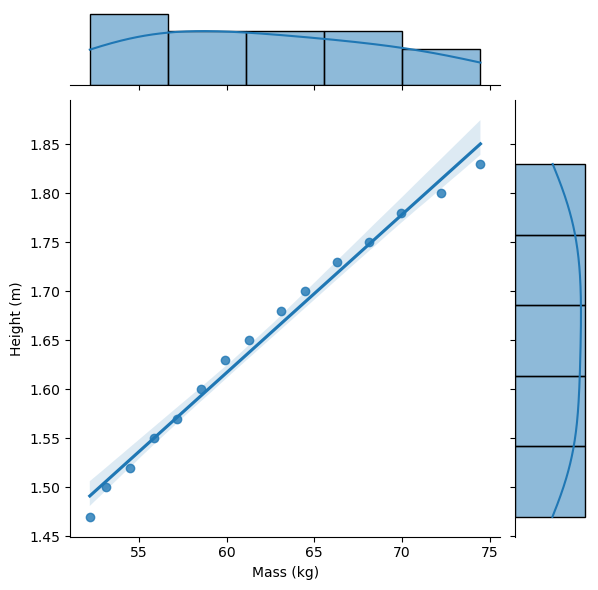

In [18]:
sb.jointplot(x = 'Mass (kg)', y = 'Height (m)', data =women, kind = 'reg')

Yes, we can see that this plot confirms what the histograms for mass and height showed previously.

**7. Split the data into training and testing data, using appropriate variable names.**   
Prepare your x and y:*▪ x: Drop the Mass column.*
▪ y: Specify the Mass column* 
◦ Use sklearn train_test_split to split the da**

In [20]:
x = women.drop('Mass (kg)', axis=1)
y = women['Mass (kg)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**8. Create the model and fit it to the training data**   
◦ Create a sklearn LinearRegression model.
◦ Use the fit method to fit it to the training data.

In [23]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

**9. Predict values based on testing data.**
◦ Use the predict method to predict values with the x testing data.

In [26]:
predictions = lm.predict(x_test)

**10.Print out error metrics:**   
◦ Mean Absolute Error (MAE)
◦ Mean Squared Error (MSE)
◦ Root Mean Squared Error (RMSE)


In [32]:
print('The Mean Absolute Error is :', metrics.mean_absolute_error(y_test,predictions))
print('The Mean Squared Error is:', metrics.mean_squared_error(y_test,predictions))
print('The Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

The Mean Absolute Error is : 0.5229978534192
The Mean Squared Error is: 0.40655070960731365
The Root Mean Squared Error is: 0.6376132915861413


**11. Predict some specific mass. Choose any height directly from the data, predict the weight for that height, and see whether the prediction is close to reality.**   
◦ Use the predict method and feed it a 2d array like: [[1.70]]
◦ Add a markdown cell and explain how well the prediction matched reality, with 
specific attention to the RMSE error. Be specific and compare the numbers. 
Superficial answers will lose marks.

In [65]:
height_to_predict = np.array([[1.70]])
predicted_mass = lm.predict(height_to_predict)
actual_mass = women.loc[women['Height (m)'] == 1.70, 'Mass (kg)'].values[0] # Get the value of mass when height is 1.70
print('When height is 1.70, the predicted mass is:',predicted_mass)
print('When height is 1.70, the actual mass is:',actual_mass)
# RMSE = MAE for only one data
rmse = abs(predicted_mass-actual_mass)
print('When height is 1.70, the error is:',rmse)

When height is 1.70, the predicted mass is: [65.03977614]
When height is 1.70, the actual mass is: 64.47
When height is 1.70, the error is: [0.56977614]


C:\Users\helen\anaconda\envs\pythonessential\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can see that the RMSE between the predicted mass and actual mass when the x=1.70 is very small, which means this model performs pretty well.

**12.Use seaborn to display an lmplot with the linear regression line shown (fit_reg=True).**   
◦ If you get warnings, use named arguments like:
▪ lmplot(x=”x axis column name”, y=”y axis column name”)
◦ Does this plot support your observations from task #6?
◦ Insert a markdown cell and note your observations. Superficial answers will lose 
marks.

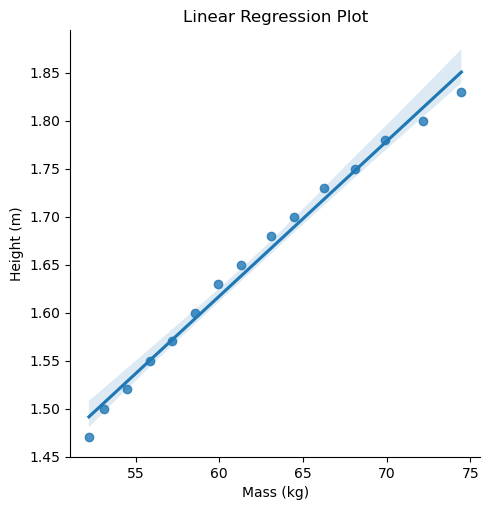

In [68]:
sb.lmplot(data=women, x='Mass (kg)', y='Height (m)')
plt.title('Linear Regression Plot')
plt.show()

Yes, the linear regression line shows the same trends as the one in the joint plot, which supports what we see in the joint plot is correct.